In [5]:
%reset -f

In [43]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist.data.values, mnist.target
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [46]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

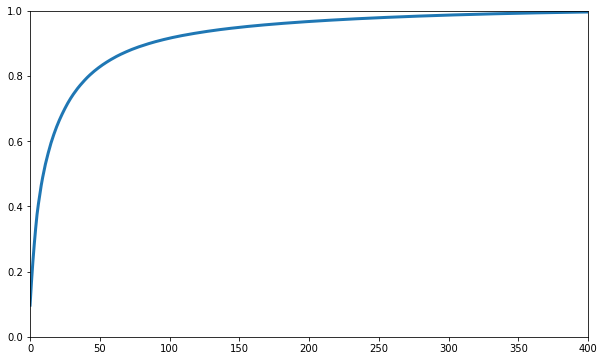

In [47]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.show()

In [48]:
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [49]:
pca.n_components_

154

In [50]:
pca.explained_variance_ratio_.sum() 

0.9501960192613033

In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

Wall time: 37.8 s


RandomForestClassifier(random_state=42)

In [52]:
%%time
from sklearn.metrics import accuracy_score
pred_train = forest_clf.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = forest_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  1.0
Accuracy score on test :  0.9705
Wall time: 2.45 s


In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_reduced_train,y_train)

Wall time: 1min 23s


RandomForestClassifier(random_state=42)

In [54]:
%%time
from sklearn.metrics import accuracy_score
pred_train = forest_clf.predict(X_reduced_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = forest_clf.predict(X_reduced_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  1.0
Accuracy score on test :  0.9481
Wall time: 2.2 s


In [56]:
X_reduced_train.shape

(60000, 154)

In [57]:
X_reduced_test.shape

(10000, 154)

In [58]:
%%time 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

Wall time: 2min 6s


SGDClassifier(random_state=42)

In [59]:
%%time
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = sgd_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  0.8807666666666667
Accuracy score on test :  0.874
Wall time: 320 ms


In [60]:
%%time 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_reduced_train,y_train)

Wall time: 22.9 s


SGDClassifier(random_state=42)

In [61]:
%%time
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_reduced_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = sgd_clf.predict(X_reduced_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  0.8929
Accuracy score on test :  0.8959
Wall time: 111 ms


In [14]:
X_train.shape

(60000, 784)

In [21]:
X_train.values[1:2,:].shape

(1, 784)

In [68]:
y_train.values[1:2][0]

'0'

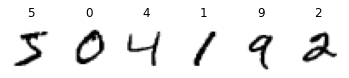

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(X_train[i:i+1,:].reshape(28,28), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(y_train.values[i:i+1][0]))

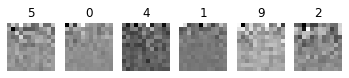

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(X_reduced_train[i:i+1,:144].reshape(12,12), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(y_train.values[i:i+1][0]))